# Import Data

In [42]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

# Initial Model

## Training the model

In [44]:
#import the Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

# train the model
nb_1 = GaussianNB() #creating an instance of the GaussianNB class.

#fitting the model to the training set.
nb_1.fit(X_train, y_train)

# make predictions on the test dataset
y_pred_1 = nb_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial Naive Bayes Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial Naive Bayes Metrics----------

Accuracy: 0.9
Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1 Score: 0.9166666666666666

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.92      0.92      0.92        36

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



## Confusion Matrix

[[21  3]
 [ 3 33]]


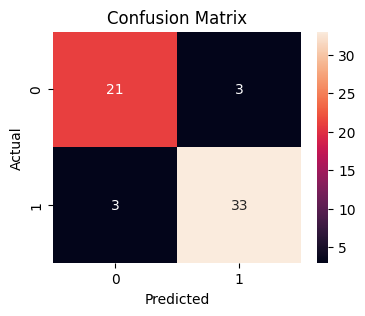

In [45]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grid Search

In [46]:
#perfrom grid search
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': np.logspace(0,-9, num=100), 
                'priors': [None, [0.5, 0.5], [0.25, 0.75], [0.75, 0.25]]
                }

#perform grid search
grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 1, cv=3, scoring='accuracy', n_jobs=-1)
nb = grid.fit(X_train, y_train)

#return the best parameters, best estimator and best score
print("Best Parameters:", nb.best_params_)
print("Best Estimator:", nb.best_estimator_)
print("Best Score:", nb.best_score_)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best Parameters: {'priors': [0.25, 0.75], 'var_smoothing': 4.328761281083062e-05}
Best Estimator: GaussianNB(priors=[0.25, 0.75], var_smoothing=4.328761281083062e-05)
Best Score: 0.8244725738396624


# Final Model

## Basic Evaluation

In [47]:
#make predictions on the test dataset
y_pred = nb.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Final Naive Bayes Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Final Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------Final Naive Bayes Metrics----------

Accuracy: 0.8666666666666667
Precision: 0.85
Recall: 0.9444444444444444
F1 Score: 0.8947368421052632

----------Final Classification Report----------

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.85      0.94      0.89        36

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



## CM

[[18  6]
 [ 2 34]]


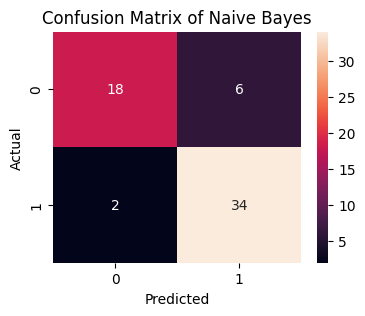

In [48]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix of Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## CV

In [49]:
#cross validation for 10 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Fold 0 : 0.8387096774193548
Fold 1 : 0.8461538461538461
Fold 2 : 0.8799999999999999
Fold 3 : 0.8666666666666666
Fold 4 : 0.8461538461538461
Fold 5 : 0.7692307692307693
Fold 6 : 0.8387096774193548
Fold 7 : 0.8333333333333334
Fold 8 : 0.8799999999999999
Fold 9 : 0.6666666666666666

Mean: 0.8265624483043836
Standard Deviation: 0.0610587222087391
Variance: 0.003

## ROC 

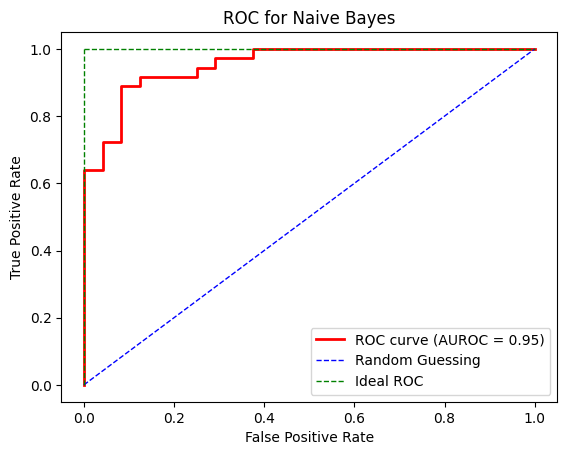

In [53]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = nb.predict_proba(X_test)[:,1] #get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.figure()
plt.plot(fpr, tpr,'r', lw=2, label='ROC curve (AUROC = %0.2f)' % roc_auc)

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#plot the axis labels and the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


## PRC

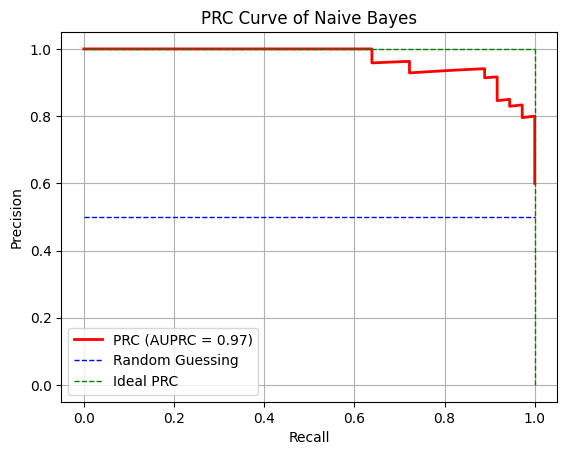

In [55]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of Naive Bayes")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## LC

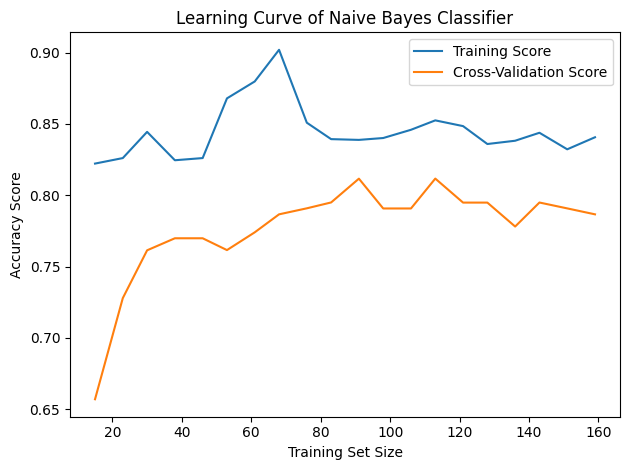

In [56]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Naive Bayes Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()